In [1]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)

using CairoMakie, DelimitedFiles, Statistics, Interpolations
using Unitful, UnitfulEquivalences
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
set_theme!(theme_ggplot2())

  Activating project at `~/code/gitHub/CarbonI`


In [29]:
CarbonI_colors

In [38]:
# Read data from other notebooks
l1_3_fpa_cbe = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_CBE.csv");
l1_4_fpa_cbe = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_CBE.csv");
l1_3_fpa_req = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_Req.csv");
l1_4_fpa_req = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_Req.csv");

cbe_instrument_wl = l1_3_fpa_cbe[:, 1];
req_instrument_wl = l1_3_fpa_req[:, 1];
e_cbe_3 = l1_3_fpa_cbe[:, 2];
e_cbe_4 = l1_4_fpa_cbe[:, 2];
e_req_3 = l1_3_fpa_req[:, 2];
e_req_4 = l1_4_fpa_req[:, 2];


# Read data from other notebooks
l1_3_data = readdlm("../../data/L1s/L1-3_lines.dat");
l1_4_data = readdlm("../../data/L1s/L1-4_lines.dat");
TotalEfficiencies = l1_3_data[:, 1];

req_error_3 = readdlm("../../data/L1s/L1-3_req_error.dat")[1];
req_error_4 = readdlm("../../data/L1s/L1-4_req_error.dat")[1];
@show req_error_3

req_error_3 = 4.295299982419913


4.295299982419913

In [35]:
@show e_cbe_3
@show e_req_3

e_cbe_3 = [17498.47121845666, 17496.42709185641, 16608.440592601663, 14418.04963444057, 13869.140500930813, 12278.097514904639, 9026.105123010648, 10993.893999545919, 14929.944105059632, 15341.86324152079, 13200.576131529371, 10737.429281315752, 10714.269128121898, 13346.446131413564, 15757.17487178955, 16109.401763911781, 15102.537344684, 13681.210776926655, 12355.37257172093, 11200.556728376243, 9215.68064750241, 8293.196588355153, 8512.106223904293, 8232.481288947007, 7513.95398050613, 6303.618359363547, 6226.843067704579, 7241.034885524192, 7567.785964328661, 6643.4747494517815, 6310.885673803529, 7474.339021698269, 8750.884783788755, 10586.902435369835, 11975.020919645704, 10796.423640859703, 10001.959418557684, 9571.562210775419, 7893.766102840434, 8157.713664046412, 9357.958240816326, 9478.805608892228, 8718.899008307639, 7963.912712666221, 9022.399896878533, 10148.469307698018, 9594.640887701662, 9100.773127575825, 8412.045015474197, 7967.599727315732, 9321.889710646217, 10725.

469-element Vector{Float64}:
  8973.516310121526
  9161.237630404352
 10078.136433919826
 10668.335198653647
 10333.389174311513
  9597.475285781004
  9399.638146281186
 10083.312185341805
 11119.115404735809
 11725.57517067055
     ⋮
  6126.258045403962
  5488.362296723916
  4866.655276443651
  4797.092850659298
  5381.513222431147
  5923.551574218384
  5725.858116176524
  4886.244295216326
  4002.5714017037612

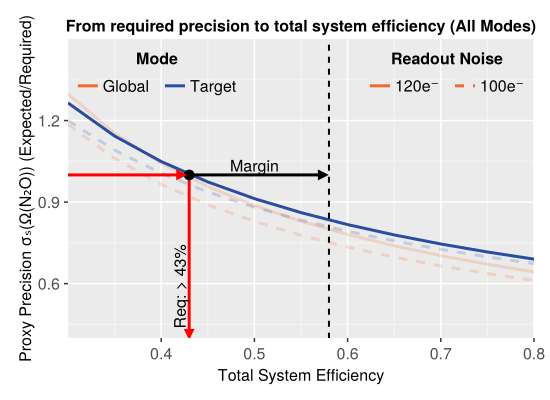

In [24]:
f = Figure(resolution=(550,400))
ax = Axis(f[1,1], xlabel="Total System Efficiency", ylabel="Proxy Precision σₛ(Ω(N₂O)) (Expected/Required)",  title="From required precision to total system efficiency (All Modes)")
# For CH4 (100 and 120e-)
al = 0.2
n2o_120_3 = lines!(ax, TotalEfficiencies, l1_3_data[:,3]/req_error_3, color=CarbonI_colors[5], linewidth=3, label="CH₄ (120e⁻)", alpha=al)
n2o_100_3 = lines!(ax, TotalEfficiencies, l1_3_data[:,2]/req_error_3, color=CarbonI_colors[5], linewidth=3, linestyle=:dash, label="CH₄ (100e⁻)", alpha=al)

# For CO2 (100 and 120e-)
n2o_120_4 = lines!(ax, TotalEfficiencies, l1_4_data[:,3]/req_error_4, color=CarbonI_colors[4], linewidth=3, label="CO₂ (120e⁻)")
n2o_100_4 = lines!(ax, TotalEfficiencies, l1_4_data[:,2]/req_error_4, color=CarbonI_colors[4], linewidth=3, linestyle=:dash, label="CO₂ (100e⁻)", alpha=al)


#lines!(ax, TotalEfficiencies, ones(length(TotalEfficiencies)), color=:black, linewidth=2, label="Requirement")

req_eff = 0.43
req_error = 1.0
eff_cbe = 0.58
arrows!(ax, [req_eff,],[req_error,],[0,],[-req_error+0.42,],arrowsize = 15, linewidth=3,color = color = :red)
text!(ax, "Req: > $(round(Int, 100req_eff))%", position = (req_eff, 0.59),
    align = (:center, :bottom), color = :black, rotation=π/2)


# Indicate Margins
arrows!(ax, [req_eff+0.002,],[req_error,],[eff_cbe-req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :black)
text!(ax, "Margin", position = (0.5, req_error),  align = (:center, :bottom), color = :black)
DR = scatter!(ax, [req_eff], [req_error], color=:black, markersize=15, label="Driving Req.")
arrows!(ax, [0.0,],[1,],[req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :red)
# Show CBE Total Efficiency
CBE = lines!(ax, [eff_cbe,eff_cbe], [0,1.5], color=:black, linestyle=:dash, linewidth=2, label="CBE")
axislegend(ax, [n2o_120_3, n2o_120_4], ["Global", "Target"], "Mode", position = :lt,
    orientation = :horizontal)
axislegend(ax, [n2o_120_3, n2o_100_3], ["120e⁻", "100e⁻"], "Readout Noise", position = :rt,
    orientation = :horizontal)

xlims!(ax,0.3,0.8)
ylims!(ax,0.4,1.5)
#axislegend(ax,position = :rt)
save("../../plots/final/Level1-3_4-EfficiencyDerivation_perMode.pdf",f)
f

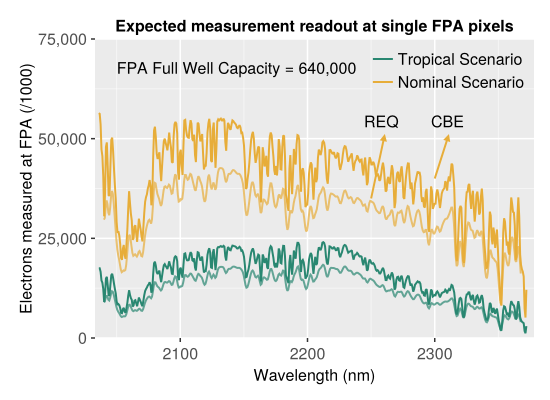

In [ ]:
from_w_to_photons = 5.03e12
refRadiance = 1.0e16 # in photons/s/m²/nm

f = Figure(resolution=(550,400))
ax = Axis(f[1,1], xlabel="Wavelength (nm)", ylabel="Electrons measured at FPA", yticks=(0:25:75, ["0","25,000", "50,000","75,000"]), title="Expected measurement readout at single FPA pixels")
#Label(f[1, 1, Top()], halign = :left, "x1000")
lines!(ax, cbe_instrument_wl,e_cbe_3/1000, color=CarbonI_colors[3], linewidth=2, label="Tropical Scenario")
lines!(ax, cbe_instrument_wl,e_cbe_4/1000, color=CarbonI_colors[1], linewidth=2, label="Nominal Scenario")
lines!(ax, req_instrument_wl,e_req_3/1000, color=CarbonI_colors[3], linewidth=2, alpha=0.7)
lines!(ax, req_instrument_wl,e_req_4/1000, color=CarbonI_colors[1], linewidth=2, alpha=0.7)
text!(ax, "FPA Full Well Capacity = 640,000", position=(2050.0,65.4),align = (:left, :bottom), color = :black)
arrows!(ax, [2300.0,],[40,],[10,],[10,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1])
arrows!(ax, [2250.0,],[35,],[10,],[15,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1], alpha=0.7)
text!(ax, "CBE", position=(2310.0,52),align = (:center, :bottom), color = :black)
text!(ax, "REQ", position=(2258.0,52),align = (:center, :bottom), color = :black)

#lines!(ax, [2035,2375], [refRadiance/ 1e16,refRadiance/ 1e16], color=:black, linestyle=:dash, linewidth=1, label="Reference Tropical Radiance")
xlims!(ax, 2033, 2378)
ylims!(ax, 0, 75)
axislegend(ax,position = :rt)
save("../../plots/final/Level1-3-4-Readout_FPA.pdf",f)
f

In [37]:
req_instrument_wl

469-element Vector{Float64}:
  8973.516310121526
  9161.237630404352
 10078.136433919826
 10668.335198653647
 10333.389174311513
  9597.475285781004
  9399.638146281186
 10083.312185341805
 11119.115404735809
 11725.57517067055
     ⋮
  6126.258045403962
  5488.362296723916
  4866.655276443651
  4797.092850659298
  5381.513222431147
  5923.551574218384
  5725.858116176524
  4886.244295216326
  4002.5714017037612